In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#List of Cities

#Create empty arrays for holding latitude & longitude and random cities
lat_lngs = []
cities = []

#Create random sets of lat and lng 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Find nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Add the city to the list if it isn't repeated
    if city not in cities:
        cities.append(city)

#Number of cities in the list
print(len(cities))

603


In [4]:

#Empty arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={citi}&units={units}"
    
    # weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #Append into empty list arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("n/a")
    


Processing Record 1 of 603: Edzell
Processing Record 2 of 603: Arraial do Cabo
Processing Record 3 of 603: Iskateley
n/a
Processing Record 5 of 603: Mataura
Processing Record 6 of 603: Bilma
Processing Record 7 of 603: Prince Rupert
Processing Record 8 of 603: Lompoc
Processing Record 9 of 603: Vaini
Processing Record 10 of 603: Makakilo City
Processing Record 11 of 603: Omboué
Processing Record 12 of 603: Busselton
Processing Record 13 of 603: Lakes Entrance
Processing Record 14 of 603: Tasiilaq
Processing Record 15 of 603: Tuktoyaktuk
Processing Record 16 of 603: Nurota
Processing Record 17 of 603: Ambilobe
Processing Record 18 of 603: East London
Processing Record 19 of 603: Carauari
Processing Record 20 of 603: Hithadhoo
Processing Record 21 of 603: Jamestown
Processing Record 22 of 603: Presidencia Roque Sáenz Peña
Processing Record 23 of 603: Jalu
Processing Record 24 of 603: Port Alfred
Processing Record 25 of 603: Huron
Processing Record 26 of 603: Castro
Processing Record 27 o

Processing Record 233 of 603: Kayerkan
Processing Record 234 of 603: Ponta Delgada
Processing Record 235 of 603: Nísia Floresta
Processing Record 236 of 603: Guerrero Negro
Processing Record 237 of 603: Margate
Processing Record 238 of 603: Shingū
Processing Record 239 of 603: Assiut
Processing Record 240 of 603: Mazagão
Processing Record 241 of 603: Baykit
Processing Record 242 of 603: Road Town
Processing Record 243 of 603: Kiryat Gat
Processing Record 244 of 603: San Alberto
Processing Record 245 of 603: Nabire
Processing Record 246 of 603: Wenling
n/a
n/a
Processing Record 249 of 603: Williamsport
Processing Record 250 of 603: Cockburn Town
Processing Record 251 of 603: Berdigestyakh
Processing Record 252 of 603: Lakatoro
Processing Record 253 of 603: Saint Anthony
Processing Record 254 of 603: Verkhnetulomskiy
Processing Record 255 of 603: Merauke
Processing Record 256 of 603: Port Hawkesbury
n/a
Processing Record 258 of 603: Innisfail
Processing Record 259 of 603: Aboyne
Processi

Processing Record 459 of 603: Iwanai
Processing Record 460 of 603: Baker City
Processing Record 461 of 603: Bergen
Processing Record 462 of 603: Price
Processing Record 463 of 603: Magadan
Processing Record 464 of 603: Khovd
Processing Record 465 of 603: Pemangkat
Processing Record 466 of 603: Ol'ga
Processing Record 467 of 603: Nicoya
Processing Record 468 of 603: Oddur
Processing Record 469 of 603: Zhezkazgan
Processing Record 470 of 603: Caucayá
Processing Record 471 of 603: Warrnambool
Processing Record 472 of 603: Half Moon Bay
Processing Record 473 of 603: Ivdel'
Processing Record 474 of 603: Hersbruck
Processing Record 475 of 603: Maiduguri
Processing Record 476 of 603: Saint-Léonard
Processing Record 477 of 603: Kovdor
n/a
n/a
Processing Record 480 of 603: Boa Vista
Processing Record 481 of 603: Takoradze
Processing Record 482 of 603: Griffith
Processing Record 483 of 603: Zhoucheng
Processing Record 484 of 603: Logansport
Processing Record 485 of 603: Mayo
Processing Record 48

In [5]:

#Convert timestamp to date
from datetime import datetime

new_date = []

for dt in date:
    new_date.append(datetime.fromtimestamp(dt))
    

# read csv file
df = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": new_date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})
# view number of items per column
df.count()

#Save dataframe as csv
df.to_csv("../output_data/cities.csv", encoding='utf-8', index=False)

In [6]:
df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Edzell,GB,2020-06-16 01:00:23,56.81,-2.65,90,100,55.00,2.24
1,Arraial do Cabo,BR,2020-06-16 01:00:24,-22.97,-42.03,98,79,69.51,13.71
2,Iskateley,RU,2020-06-16 01:00:24,67.68,53.15,65,60,45.36,12.71
3,Mataura,NZ,2020-06-16 01:00:24,-46.19,168.86,100,82,51.28,4.65
4,Bilma,NE,2020-06-16 01:00:24,18.69,12.92,0,15,87.35,16.17
...,...,...,...,...,...,...,...,...,...
549,Marsh Harbour,BS,2020-06-16 01:01:23,26.54,-77.06,92,78,79.77,10.54
550,Manokwari,ID,2020-06-16 01:01:24,-0.87,134.08,21,67,85.26,5.61
551,Haines Junction,CA,2020-06-16 01:01:24,60.75,-137.51,100,60,60.37,4.68
552,Guaíba,BR,2020-06-16 01:00:25,-30.11,-51.33,20,100,57.00,1.12


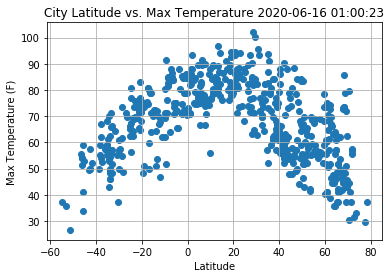

In [7]:
#Scatterplot
plt.scatter(df["Latitude"], df["Max Temperature"])

#x and y axis labels & title 
plt.title(f"City Latitude vs. Max Temperature {new_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#grid lines
plt.grid()

#show and save graph as picture
plt.savefig("../output_data/LatitudevsTemperature.png")
plt.show()

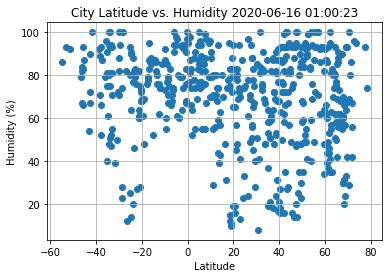

In [8]:
#Scatterplot
plt.scatter(df["Latitude"], df["Humidity"])

#x and y axis labels & title 
plt.title(f"City Latitude vs. Humidity {new_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#grid lines
plt.grid()

# show and save graph as picture
plt.savefig("../output_data/LatitudevsHumidity.png")
plt.show()

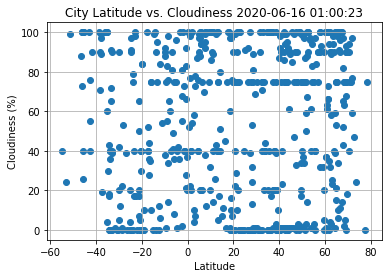

In [9]:

#Scatterplot
plt.scatter(df["Latitude"], df["Cloudiness"])

#x and y axis labels & title
plt.title(f"City Latitude vs. Cloudiness {new_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#grid lines
plt.grid()

#show and save graph as picture
plt.savefig("../output_data/LatitudevsCloudiness.png")
plt.show()

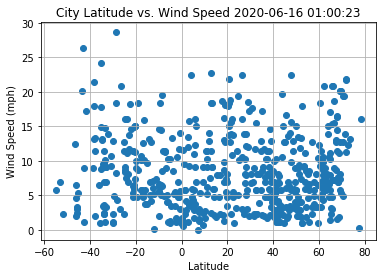

In [10]:
#Scatterplot
plt.scatter(df["Latitude"], df["Wind Speed"])

#x and y axis labels & title 
plt.title(f"City Latitude vs. Wind Speed {new_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#grid lines
plt.grid()

#show and save graph as picture
plt.savefig("../output_data/LatitudevsWindspeed.png")
plt.show()

In [11]:
#Northern Hemisphere Arrays (X-Value,Temp,Humidity,Cloudiness,Windspeed)
n_x_values = []
n_y_values = []
n_hmdy_values = []
n_cldnss_values = []
n_windspd_values = []

#Southern Hemisphere Arrays (X-Value,Temp,Humidity,Cloudiness,Windspeed)
s_x_values = []
s_y_values = []
s_hmdy_values = []
s_cldnss_values = []
s_windspd_values = []


#Create an Index 
indexes = range(0, len(df["City"]))

#Append into empty arrays
for index in indexes:
    if df["Latitude"][index] >= 0:
        n_x_values.append(df["Latitude"][index])
        n_y_values.append(df["Max Temperature"][index])
        n_hmdy_values.append(df["Humidity"][index])
        n_cldnss_values.append(df["Cloudiness"][index])
        n_windspd_values.append(df["Wind Speed"][index])
    if df["Latitude"][index] < 0:
        s_x_values.append(df["Latitude"][index])
        s_y_values.append(df["Max Temperature"][index])
        s_hmdy_values.append(df["Humidity"][index])
        s_cldnss_values.append(df["Cloudiness"][index])
        s_windspd_values.append(df["Wind Speed"][index])
        
#Give the array values the integer datatype
n_x_values = np.array(n_x_values, dtype = "int")
s_x_values = np.array(s_x_values, dtype = "int")
n_y_values = np.array(n_y_values, dtype = "int")
s_y_values = np.array(s_y_values, dtype = "int")
n_hmdy_values = np.array(n_hmdy_values, dtype = "int")
s_hmdy_values = np.array(s_hmdy_values, dtype = "int")
n_cldnss_values = np.array(n_cldnss_values, dtype = "int")
s_cldnss_values = np.array(s_cldnss_values, dtype = "int")
n_windspd_values = np.array(n_windspd_values, dtype = "int")
s_windspd_values = np.array(s_windspd_values, dtype = "int")


The r-squared is: -0.7108733867384572


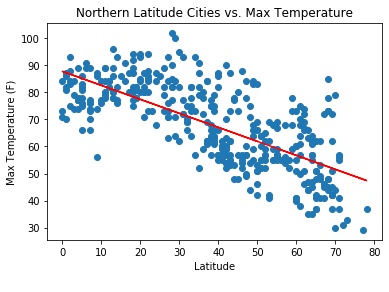

In [12]:
#X and Y axis labels and table title
plt.title("Northern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Scatter plot
plt.scatter(n_x_values, n_y_values)

#Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_y_values)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/NorthLatvsMaxTemp.png")
plt.show()


The r-squared is: 0.7262506316735079


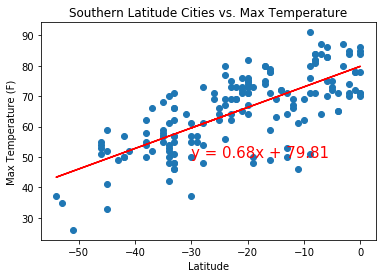

In [13]:
#X and Y axis labels and table title
plt.title("Southern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Scatter Plot
plt.scatter(s_x_values, s_y_values)

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_y_values)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

#show and save graph as picture
plt.savefig("../output_data/SouthLatvsTemp.png")
plt.show()



The r-squared is: -0.056695880225334144


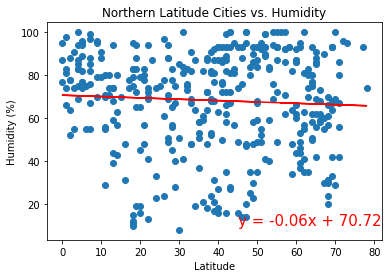

In [14]:
#X and Y axis labels and table title
plt.title("Northern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Scatter Plot
plt.scatter(n_x_values, n_hmdy_values)

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_hmdy_values)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/NorthLatvsHumidity.png")
plt.show()

The r-squared is: 0.05608498493410568


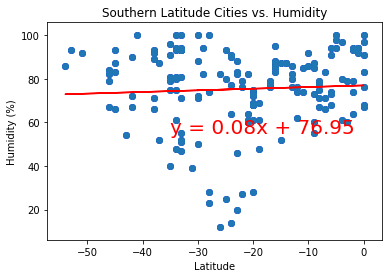

In [15]:
#X and Y axis labels and table title
plt.title("Southern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Scatter Plot
plt.scatter(s_x_values, s_hmdy_values,c="blue")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_hmdy_values)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_x_values, s_hmdy_values)
plt.plot(s_x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,55),fontsize=20,color="red")
print(f"The r-squared is: {rvalue}")

# show and save graph as picture
plt.savefig("../output_data/SouthLatvsHumidity.png")
plt.show()


The r-squared is: 0.03049072883522292


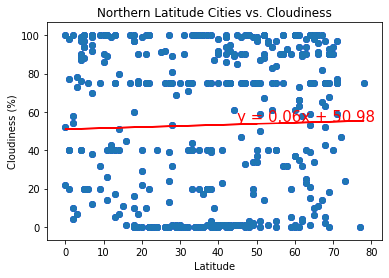

In [16]:
#X and Y axis labels and table title
plt.title("Northern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Scatter Plot
plt.scatter(n_x_values, n_cldnss_values, c='blue')

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_cldnss_values)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_x_values, n_cldnss_values)
plt.plot(n_x_values,regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

# show and save graph as picture
plt.savefig("../output_data/NorthLatvsCloudiness.png")
plt.show()

The r-squared is: -0.03128745663608426


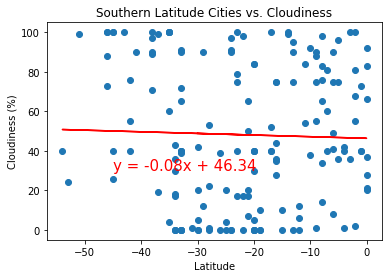

In [17]:
#X and Y axis labels and table title
plt.title("Southern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Scatter Plot
plt.scatter(s_x_values, s_cldnss_values)

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_cldnss_values)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

# show and save graph as picture
plt.savefig("../output_data/SouthLatvCloudiness.png")
plt.show()

The r-squared is: 0.1068719265784302


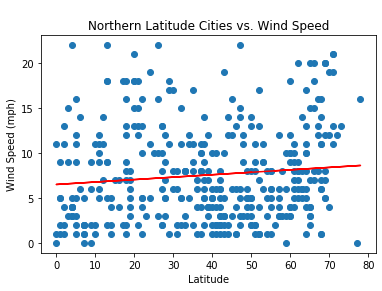

In [21]:
#X and Y axis labels and table title
plt.title("Northern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Scatterplot
plt.scatter(n_x_values, n_windspd_values)

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_windspd_values)
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

# show and save graph as picture 
plt.savefig("../output_data/NorhtLatvsWind.png")
plt.show()

The r-squared is: -0.13944725925113183


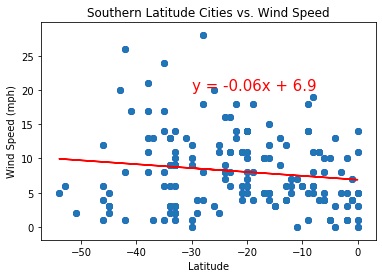

In [19]:
#X and Y axis labels and table title
plt.title("Southern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Scatter Plot
plt.scatter(s_x_values, s_windspd_values,c='blue')

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_windspd_values)
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_x_values, s_windspd_values)
plt.plot(s_x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

# show and save graph as picture
plt.savefig("../output_data/SouthLatvsWind.png")
plt.show()
